In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
fortune=pd.read_csv("fortune1000.csv")

In [3]:
fortune.head()

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000
1,2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
4,5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400


In [4]:
fortune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       1000 non-null   int64 
 1   Company    1000 non-null   object
 2   Sector     1000 non-null   object
 3   Industry   1000 non-null   object
 4   Location   1000 non-null   object
 5   Revenue    1000 non-null   int64 
 6   Profits    1000 non-null   int64 
 7   Employees  1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [5]:
fortune.describe()

,Rank,Revenue,Profits,Employees
count,1000.00000,1000.000000,1000.000000,1.000000e+03
mean,500.49600,13535.525000,894.093000,3.302800e+04
std,288.81727,28820.519135,3297.063594,9.042769e+04
min,1.00000,1895.000000,-23119.000000,5.200000e+01
25%,250.75000,2898.250000,82.750000,6.405250e+03
50%,500.50000,5113.000000,282.500000,1.251950e+04
75%,750.25000,11386.000000,784.500000,2.812500e+04
max,1000.00000,482130.000000,53394.000000,2.300000e+06


In [6]:
fortune.sort_values(by="Profits",ascending=False) #already sorted acc. to rank

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000
22,23,J.P. Morgan Chase,Financials,Commercial Banks,"New York, NY",101006,24442,234598
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000
26,27,Wells Fargo,Financials,Commercial Banks,"San Francisco, CA",90033,22894,264700
85,86,Gilead Sciences,Health Care,Pharmaceuticals,"Foster City, CA",32639,18108,8000
...,...,...,...,...,...,...,...,...
224,225,Occidental Petroleum,Energy,"Mining, Crude-Oil Production","Houston, TX",12699,-7829,11100
174,175,Freeport-McMoRan,Energy,"Mining, Crude-Oil Production","Phoenix, AZ",15877,-12236,34500
215,216,Devon Energy,Energy,"Mining, Crude-Oil Production","Oklahoma City, OK",13145,-14454,5167
222,223,Chesapeake Energy,Energy,"Mining, Crude-Oil Production","Oklahoma City, OK",12764,-14685,4400


In [7]:
City=[]
StateBased=[]
for i in fortune.Location:
    x=i.split(",")
    if x[1] not in City :
        City.append(x[1])
    StateBased.append(x[1])
    

In [8]:
City

[' AR',
 ' TX',
 ' CA',
 ' NE',
 ' MN',
 ' RI',
 ' MI',
 ' CT',
 ' PA',
 ' NY',
 ' WA',
 ' DC',
 ' OH',
 ' IL',
 ' MO',
 ' NC',
 ' GA',
 ' IN',
 ' NJ',
 ' VA',
 ' KY',
 ' TN',
 ' MD',
 ' WI',
 ' MA',
 ' FL',
 ' OR',
 ' DE',
 ' AZ',
 ' CO',
 ' LA',
 ' OK',
 ' ID',
 ' IA',
 ' NV',
 ' KS',
 ' AL',
 ' SC',
 ' VT',
 ' ND',
 ' NH',
 ' UT',
 ' PR',
 ' MS',
 ' HI']

In [9]:
fortune["StateBased"]=StateBased

In [10]:
fortune.head()

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees,StateBased
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000,AR
1,2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600,TX
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000,CA
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000,NE
4,5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400,CA


In [11]:
sector=fortune.groupby(by=["Sector"])

In [12]:
sector.groups

{'Aerospace & Defense': Int64Index([ 23,  44,  59,  87, 117, 119, 208, 244, 281, 377, 388, 489, 559,
             604, 784, 787, 835, 902, 957, 986],
            dtype='int64'),
 'Apparel': Int64Index([90, 230, 339, 353, 447, 546, 574, 596, 682, 694, 725, 793, 876,
             881, 916],
            dtype='int64'),
 'Business Services': Int64Index([143, 185, 198, 203, 220, 247, 248, 293, 306, 311, 354, 391, 403,
             439, 466, 467, 480, 484, 491, 502, 544, 625, 634, 651, 676, 693,
             713, 728, 733, 734, 736, 743, 766, 775, 776, 782, 790, 791, 795,
             800, 802, 815, 818, 819, 868, 869, 885, 938, 950, 951, 992],
            dtype='int64'),
 'Chemicals': Int64Index([ 55, 100, 181, 188, 205, 252, 261, 276, 287, 295, 315, 537, 548,
             554, 565, 579, 612, 623, 653, 667, 716, 719, 723, 757, 760, 828,
             864, 897, 933, 948],
            dtype='int64'),
 'Energy': Int64Index([  1,  13,  29,  31,  41,  64,  89,  94,  97, 103,
             ...
    

In [13]:
sector.first()

,Rank,Company,Industry,Location,Revenue,Profits,Employees,StateBased
Sector,,,,,,,,
Aerospace & Defense,24,Boeing,Aerospace and Defense,"Chicago, IL",96114,5176,161400,IL
Apparel,91,Nike,Apparel,"Beaverton, OR",30601,3273,62600,OR
Business Services,144,ManpowerGroup,Temporary Help,"Milwaukee, WI",19330,419,27000,WI
Chemicals,56,Dow Chemical,Chemicals,"Midland, MI",48778,7685,49495,MI
Energy,2,Exxon Mobil,Petroleum Refining,"Irving, TX",246204,16150,75600,TX
Engineering & Construction,155,Fluor,"Engineering, Construction","Irving, TX",18114,413,38758,TX
Financials,4,Berkshire Hathaway,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000,NE
Food and Drug Stores,7,CVS Health,Food and Drug Stores,"Woonsocket, RI",153290,5237,199000,RI
"Food, Beverages & Tobacco",41,Archer Daniels Midland,Food Production,"Chicago, IL",67702,1849,32300,IL


In [14]:
y=sector.size()
y.index

Index(['Aerospace & Defense', 'Apparel', 'Business Services', 'Chemicals',
       'Energy', 'Engineering & Construction', 'Financials',
       'Food and Drug Stores', 'Food, Beverages & Tobacco', 'Health Care',
       'Hotels, Resturants & Leisure', 'Household Products', 'Industrials',
       'Materials', 'Media', 'Motor Vehicles & Parts', 'Retailing',
       'Technology', 'Telecommunications', 'Transportation', 'Wholesalers'],
      dtype='object', name='Sector')

In [15]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 0, 'No. of Companies')

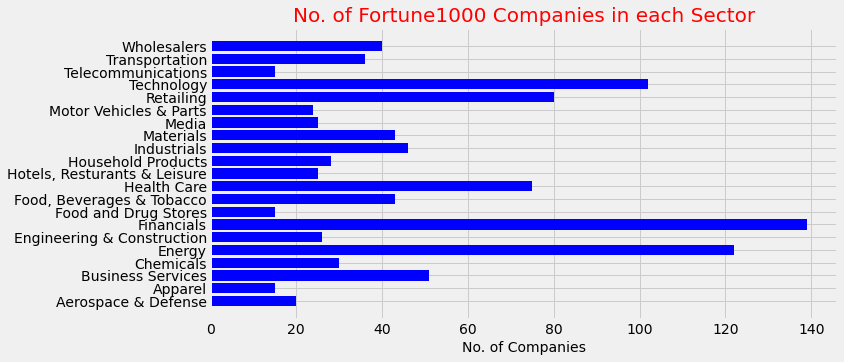

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))

plt.barh(y.index,y,color="Blue")
plt.title("No. of Fortune1000 Companies in each Sector" , fontdict={"color":"Red","fontsize":20})
plt.xlabel("No. of Companies",fontdict={"color":"Black","fontsize":14})


In [17]:
sector.Revenue.sum().sort_values(ascending=False) #Revenue of each Sector

Sector
Financials                      2217159
Health Care                     1614707
Energy                          1517809
Retailing                       1465076
Technology                      1377600
Food, Beverages & Tobacco        555967
Industrials                      497581
Food and Drug Stores             483769
Motor Vehicles & Parts           482540
Telecommunications               461834
Wholesalers                      444800
Transportation                   408508
Aerospace & Defense              357940
Business Services                272195
Materials                        259145
Chemicals                        243897
Household Products               234737
Media                            220764
Hotels, Resturants & Leisure     169546
Engineering & Construction       153983
Apparel                           95968
Name: Revenue, dtype: int64

In [18]:
sector.Profits.sum().sort_values(ascending=False)

Sector
Financials                      260209
Technology                      180473
Health Care                     106114
Food, Beverages & Tobacco        51417
Telecommunications               48637
Retailing                        47830
Transportation                   44169
Aerospace & Defense              28742
Business Services                28227
Motor Vehicles & Parts           25898
Media                            24347
Chemicals                        22628
Industrials                      20764
Hotels, Resturants & Leisure     20697
Food and Drug Stores             16759
Household Products               14428
Apparel                           8236
Wholesalers                       8233
Engineering & Construction        5304
Materials                         4428
Energy                          -73447
Name: Profits, dtype: int64

In [19]:
sector.Employees.mean().sort_values(ascending=False)

Sector
Hotels, Resturants & Leisure    99369.800000
Food and Drug Stores            93026.533333
Retailing                       77845.362500
Telecommunications              55497.866667
Aerospace & Defense             48402.850000
Motor Vehicles & Parts          45106.666667
Transportation                  42688.694444
Health Care                     35710.520000
Technology                      35087.735294
Industrials                     33591.934783
Food, Beverages & Tobacco       28177.488372
Business Services               26687.254902
Financials                      24172.287770
Apparel                         23093.133333
Household Products              23072.785714
Media                           22012.560000
Engineering & Construction      15642.615385
Chemicals                       15455.033333
Materials                       14840.069767
Wholesalers                     13139.925000
Energy                           9745.303279
Name: Employees, dtype: float64

In [20]:
sector.Employees.min()

Sector
Aerospace & Defense             6955
Apparel                         5978
Business Services               2400
Chemicals                       1979
Energy                           480
Engineering & Construction      1036
Financials                       187
Food and Drug Stores            1616
Food, Beverages & Tobacco       1857
Health Care                     2924
Hotels, Resturants & Leisure    8500
Household Products              4406
Industrials                     4104
Materials                         52
Media                           2341
Motor Vehicles & Parts          2700
Retailing                       2155
Technology                      2285
Telecommunications              2700
Transportation                  1223
Wholesalers                      500
Name: Employees, dtype: int64

In [21]:
Industry=fortune.groupby(by=['Industry'])

In [22]:
Industry.ngroups

73

In [23]:
Industry.size()

Industry
Advertising, marketing                            2
Aerospace and Defense                            20
Airlines                                          9
Apparel                                          15
Automotive Retailing, Services                   10
                                                 ..
Waste Management                                  5
Wholesalers: Diversified                         25
Wholesalers: Electronics and Office Equipment     8
Wholesalers: Food and Grocery                     6
Wholesalers: Health Care                          6
Length: 73, dtype: int64

In [24]:
Industry.size().index

Index(['Advertising, marketing', 'Aerospace and Defense', 'Airlines',
       'Apparel', 'Automotive Retailing, Services', 'Beverages',
       'Building Materials, Glass', 'Chemicals', 'Commercial Banks',
       'Computer Peripherals', 'Computer Software',
       'Computers, Office Equipment', 'Construction and Farm Machinery',
       'Diversified Financials', 'Diversified Outsourcing Services',
       'Education', 'Electronics, Electrical Equip.', 'Energy',
       'Engineering, Construction', 'Entertainment', 'Financial Data Services',
       'Food Consumer Products', 'Food Production', 'Food Services',
       'Food and Drug Stores', 'Forest and Paper Products',
       'General Merchandisers', 'Health Care: Insurance and Managed Care',
       'Health Care: Medical Facilities',
       'Health Care: Pharmacy and Other Services',
       'Home Equipment, Furnishings', 'Homebuilders',
       'Hotels, Casinos, Resorts', 'Household and Personal Products',
       'Industrial Machinery', 'Infor

In [25]:
Industry.Profits.sum().sort_values(ascending=False)

Industry
Commercial Banks                            129760
Pharmaceuticals                              68273
Computers, Office Equipment                  58433
Telecommunications                           48637
Insurance: Property and Casualty (Stock)     44803
                                             ...  
Publishing, Printing                         -1339
Metals                                       -2241
Oil and Gas Equipment, Services              -4047
Energy                                      -13038
Mining, Crude-Oil Production               -124555
Name: Profits, Length: 73, dtype: int64

In [26]:
TopIndustry=Industry.Revenue.sum().sort_values(ascending=False).head(15)

In [27]:
TopIndustry

Industry
Petroleum Refining                          705472
General Merchandisers                       684320
Commercial Banks                            623669
Insurance: Property and Casualty (Stock)    548027
Specialty Retailers: Other                  543958
Food and Drug Stores                        483769
Motor Vehicles and Parts                    482540
Health Care: Insurance and Managed Care     463373
Telecommunications                          461834
Wholesalers: Health Care                    444512
Aerospace and Defense                       357940
Computers, Office Equipment                 353781
Utilities: Gas and Electric                 343411
Diversified Financials                      327075
Pharmaceuticals                             312970
Name: Revenue, dtype: int64

In [28]:
list(TopIndustry)

[705472,
 684320,
 623669,
 548027,
 543958,
 483769,
 482540,
 463373,
 461834,
 444512,
 357940,
 353781,
 343411,
 327075,
 312970]

No handles with labels found to put in legend.


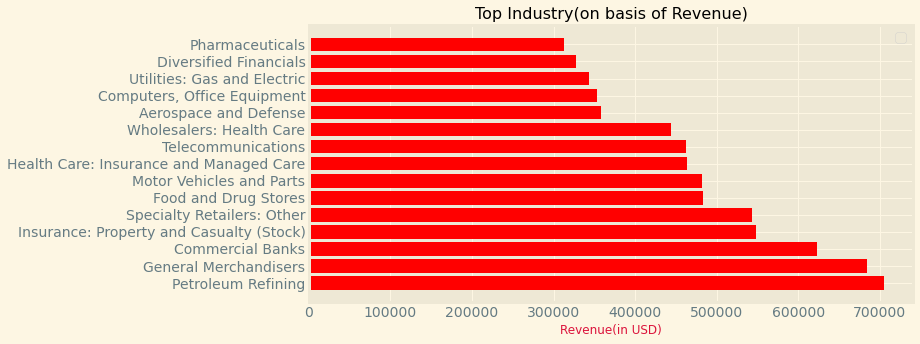

In [29]:
plt.style.use('Solarize_Light2')

plt.figure(figsize=(13,5))

plt.barh(TopIndustry.index,list(TopIndustry),color="Red")
plt.title("Top Industry(on basis of Revenue)")
plt.xlabel("Revenue(in USD)",fontsize=12,color="Crimson")
plt.legend()

plt.tight_layout()

In [30]:
fortune.Employees.describe()

count    1.000000e+03
mean     3.302800e+04
std      9.042769e+04
min      5.200000e+01
25%      6.405250e+03
50%      1.251950e+04
75%      2.812500e+04
max      2.300000e+06
Name: Employees, dtype: float64

In [31]:
Emp_Range=[]
for i in fortune.Employees :
    if i <= 6405 :
        Emp_Range.append(" < 25 percentile")
    elif i <= 12519 :
        Emp_Range.append("25-50 percentile")
    elif i<= 28125 :
        Emp_Range.append("50-75 percentile")
    elif i> 28125 :
        Emp_Range.append("> 75 percentile")

In [32]:
df=fortune.copy()

In [33]:
df["Emp_Range"]=Emp_Range

In [34]:
df.head()

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees,StateBased,Emp_Range
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000,AR,> 75 percentile
1,2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600,TX,> 75 percentile
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000,CA,> 75 percentile
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000,NE,> 75 percentile
4,5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400,CA,> 75 percentile


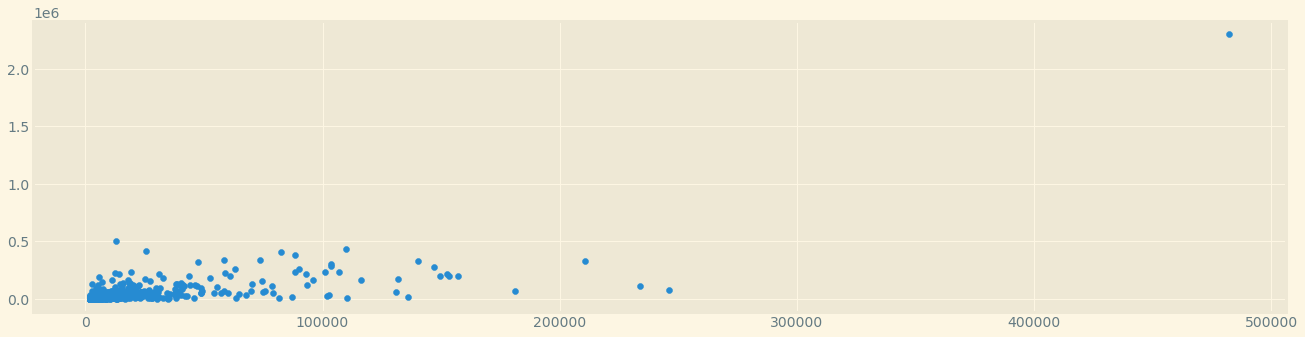

In [35]:
plt.figure(figsize=(20,5))
plt.scatter(fortune.Revenue,fortune.Employees)

In [36]:
Employee=df.groupby(by=["Emp_Range"])

In [37]:
Employee.size()

Emp_Range
 < 25 percentile    250
25-50 percentile    250
50-75 percentile    250
> 75 percentile     250
dtype: int64

In [38]:
Employee["Revenue"].sum()  

Emp_Range
 < 25 percentile    1109890
25-50 percentile    1571441
50-75 percentile    2164199
> 75 percentile     8689995
Name: Revenue, dtype: int64

In [39]:
Employee.get_group("> 75 percentile")

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees,StateBased,Emp_Range
0,1,Walmart,Retailing,General Merchandisers,"Bentonville, AR",482130,14694,2300000,AR,> 75 percentile
1,2,Exxon Mobil,Energy,Petroleum Refining,"Irving, TX",246204,16150,75600,TX,> 75 percentile
2,3,Apple,Technology,"Computers, Office Equipment","Cupertino, CA",233715,53394,110000,CA,> 75 percentile
3,4,Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",210821,24083,331000,NE,> 75 percentile
4,5,McKesson,Health Care,Wholesalers: Health Care,"San Francisco, CA",181241,1476,70400,CA,> 75 percentile
...,...,...,...,...,...,...,...,...,...,...
743,744,Convergys,Business Services,Diversified Outsourcing Services,"Cincinnati, OH",2951,169,130000,OH,> 75 percentile
762,763,Cracker Barrel Old Country Store,"Hotels, Resturants & Leisure",Food Services,"Lebanon, TN",2842,164,72000,TN,> 75 percentile
796,797,Panera Bread,"Hotels, Resturants & Leisure",Food Services,"St. Louis, MO",2682,149,37200,MO,> 75 percentile
940,941,Cheesecake Factory,"Hotels, Resturants & Leisure",Food Services,"Calabasas Hills, CA",2101,117,37600,CA,> 75 percentile


In [40]:
states=fortune.groupby(by=["StateBased"])

In [41]:
states.ngroups

45

In [42]:
states.size().sort_values(ascending=False).head(15)

StateBased
 CA    108
 TX     99
 NY     95
 IL     64
 OH     55
 PA     46
 VA     37
 FL     35
 MA     31
 NJ     30
 GA     30
 MI     30
 CT     29
 MO     25
 MN     25
dtype: int64

In [43]:
s=states.Revenue.sum().sort_values(ascending=False).head(15)

In [44]:
s

StateBased
 CA    1672700
 NY    1509419
 TX    1395413
 IL     924124
 OH     688569
 AR     559178
 MI     544020
 MN     516969
 PA     489858
 CT     461893
 GA     409381
 WA     407552
 NJ     385007
 VA     380575
 FL     307008
Name: Revenue, dtype: int64

In [45]:
s.index

Index([' CA', ' NY', ' TX', ' IL', ' OH', ' AR', ' MI', ' MN', ' PA', ' CT',
       ' GA', ' WA', ' NJ', ' VA', ' FL'],
      dtype='object', name='StateBased')

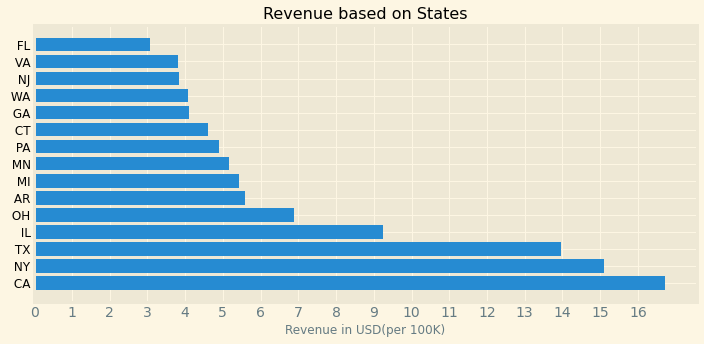

In [46]:
plt.figure(figsize=(10,5))
plt.barh(s.index,s)
plt.title("Revenue based on States")
ticks=np.arange(0,1700000,100000)
labels=["{}".format(i//100000) for i in ticks]
plt.yticks(s.index,s.index,fontsize=12,color="Black")
plt.xticks(ticks,labels)
plt.xlabel("Revenue in USD(per 100K)")
plt.tight_layout()

In [47]:
rp=fortune.head(10)

In [48]:
rp.loc[:,["Company","Revenue","Profits"]]

,Company,Revenue,Profits
0,Walmart,482130,14694
1,Exxon Mobil,246204,16150
2,Apple,233715,53394
3,Berkshire Hathaway,210821,24083
4,McKesson,181241,1476
5,UnitedHealth Group,157107,5813
6,CVS Health,153290,5237
7,General Motors,152356,9687
8,Ford Motor,149558,7373
9,AT&T,146801,13345


In [49]:
company=list(rp.Company)
company.reverse()
R=list(rp.Revenue)
R.reverse()
P=list(rp.Profits)
P.reverse()

In [50]:
R

[146801,
 149558,
 152356,
 153290,
 157107,
 181241,
 210821,
 233715,
 246204,
 482130]

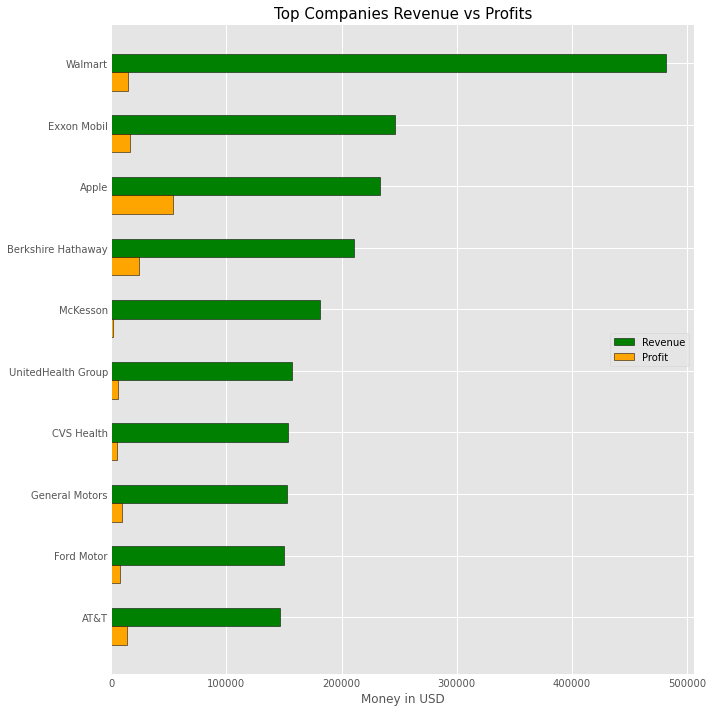

In [51]:
plt.style.use("ggplot")
rev=np.arange(len(company))
plt.figure(figsize=(10,10))

plt.title("Top Companies Revenue vs Profits",fontsize=15)
plt.barh(rev,R,color="Green",height=0.3,edgecolor="Black",label="Revenue")
plt.barh(rev-0.3,P,color="Orange",height=0.3,edgecolor="Black",label="Profit")
plt.yticks(rev,company)
plt.xlabel("Money in USD")
plt.legend(loc="center right")
plt.tight_layout()